In [2]:
"""View and record the performance of a WANN with various weight values.

TODO: Parallelize evaluation

"""

# python wann_test.py -p p/swingup.json -i champions/swing.out --nReps 3 --view True

import numpy as np
import argparse
import sys

np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)

from neat_src import * # NEAT and WANNs
from domain import *   # Task environments

def main(env, model, reps=3, view=False, nVals=6):
  infile  = model
  outPref = "log/result_notebook_"
  hyp_default = "p/default_wann.json"
  hyp_adjust  = env
  nMean   = nVals
  nRep    = reps
  view    = view
  seed    = -1

  # Load task and parameters
  hyp = loadHyp(pFileName=hyp_default)
  updateHyp(hyp,hyp_adjust)
  task = WannGymTask(games[hyp['task']], nReps=hyp['alg_nReps'])

  # Bullet needs some extra help getting started
  if hyp['task'].startswith("bullet"):
    task.env.render("human")

  # Import individual for testing
  wVec, aVec, wKey = importNet(infile)

  # Show result
  fitness, wVals = task.getFitness(wVec, aVec, hyp,
                                nVals=nMean, nRep=nRep,\
                                view=view,returnVals=True, seed=seed)      

  print("[***]\tFitness:", fitness , '\n' + "[***]\tWeight Values:\t" , wVals) 
  lsave(outPref+'reward.out',fitness)
  lsave(outPref+'wVals.out',wVals)

  plt.subplots(figsize=(8,5))
  plt.plot(wVals, fitness, linewidth=0.8, alpha=0.6)
  plt.xlabel("Weight")
  plt.ylabel("Fitness")
  # plt.show()
  plt.savefig("lander_60.png")
  return wVals, fitness
# -- --------------------------------------------------------------------- -- #
def str2bool(v):
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

# if __name__ == "__main__":
#   ''' Parse input and launch '''
#   parser = argparse.ArgumentParser(description=('Test ANNs on Task'))
    
#   parser.add_argument('-i', '--infile', type=str,\
#    help='file name for genome input', default='log/test_best.out')

#   parser.add_argument('-o', '--outPref', type=str,\
#    help='file name prefix for result input', default='log/result_')
  
#   parser.add_argument('-d', '--default', type=str,\
#    help='default hyperparameter file', default='p/default_wann.json')

#   parser.add_argument('-p', '--hyperparam', type=str,\
#    help='hyperparameter file', default=None)

#   parser.add_argument('-n', '--nVals', type=int,\
#    help='Number of weight values to test', default=6)
   
#   parser.add_argument('-r', '--nReps', type=int,\
#    help='Number of repetitions', default=1)

#   parser.add_argument('-v', '--view', type=str2bool,\
#    help='Visualize trial?', default=False)

#   parser.add_argument('-s', '--seed', type=int,\
#    help='random seed', default=-1)

#   args = parser.parse_args()
#   main(args)                             
  


*** Running with hyperparameters:  p/lander.json 	***
[***]	Fitness: [ -31.86  251.01  117.42  104.13  -39.06   79.51  144.47   33.31  142.86  122.66   82.55 -135.01   84.33  104.84  214.42  126.88   56.87  227.99  145.67
  269.7   190.44  274.51  278.93  268.55  290.55  270.79  287.03  254.92  187.25  152.38 -360.66 -136.89 -151.45 -128.98 -125.56 -136.45 -148.72 -114.35
  -83.83 -156.55 -111.83 -100.1   -93.17 -104.   -114.08 -121.66 -141.07 -143.17 -145.66  -73.54 -148.14 -162.41 -189.13 -139.49 -137.26 -152.75 -167.7
 -140.9  -106.94 -117.56] 
[***]	Weight Values:	 [-10.    -9.66  -9.32  -8.98  -8.64  -8.31  -7.97  -7.63  -7.29  -6.95  -6.61  -6.27  -5.93  -5.59  -5.25  -4.92  -4.58  -4.24  -3.9   -3.56  -3.22  -2.88
  -2.54  -2.2   -1.86  -1.53  -1.19  -0.85  -0.51  -0.17   0.17   0.51   0.85   1.19   1.53   1.86   2.2    2.54   2.88   3.22   3.56   3.9    4.24   4.58
   4.92   5.25   5.59   5.93   6.27   6.61   6.95   7.29   7.63   7.97   8.31   8.64   8.98   9.32   9.66  10.  ]


(array([-10.  ,  -9.66,  -9.32,  -8.98,  -8.64,  -8.31,  -7.97,  -7.63,  -7.29,  -6.95,  -6.61,  -6.27,  -5.93,  -5.59,  -5.25,  -4.92,  -4.58,  -4.24,  -3.9 ,
         -3.56,  -3.22,  -2.88,  -2.54,  -2.2 ,  -1.86,  -1.53,  -1.19,  -0.85,  -0.51,  -0.17,   0.17,   0.51,   0.85,   1.19,   1.53,   1.86,   2.2 ,   2.54,
          2.88,   3.22,   3.56,   3.9 ,   4.24,   4.58,   4.92,   5.25,   5.59,   5.93,   6.27,   6.61,   6.95,   7.29,   7.63,   7.97,   8.31,   8.64,   8.98,
          9.32,   9.66,  10.  ]),
 array([ -31.86,  251.01,  117.42,  104.13,  -39.06,   79.51,  144.47,   33.31,  142.86,  122.66,   82.55, -135.01,   84.33,  104.84,  214.42,  126.88,   56.87,
         227.99,  145.67,  269.7 ,  190.44,  274.51,  278.93,  268.55,  290.55,  270.79,  287.03,  254.92,  187.25,  152.38, -360.66, -136.89, -151.45, -128.98,
        -125.56, -136.45, -148.72, -114.35,  -83.83, -156.55, -111.83, -100.1 ,  -93.17, -104.  , -114.08, -121.66, -141.07, -143.17, -145.66,  -73.54, -148.14,
   

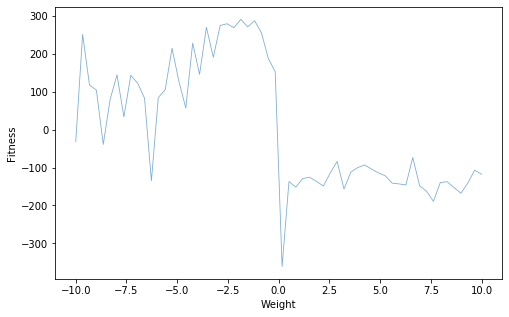

In [4]:
import matplotlib.pyplot as plt
# main("p/swingup.json", "log/test_best.out", view=True, nVals=2)
main("p/lander.json", "log/lander_best/0456.out", view=False, nVals=60)

In [4]:
import matplotlib.pyplot as plt
# main("p/swingup.json", "log/test_best.out", view=True, nVals=2)
ws, fitness = main("p/laptop_swing.json", "log/test_best.out", view=False, nVals=6)

*** Running with hyperparameters:  p/laptop_swing.json 	***


KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
# main("p/swingup.json", "log/test_best.out", view=True, nVals=2)
ws, fitness = main("p/swingup.json", "champions/swing.out", view=True, nVals=6)

*** Running with hyperparameters:  p/swingup.json 	***


KeyboardInterrupt: 

In [10]:
for w, f in [*zip(ws, fitness)][0:300]:
    print(w, f)

-1.1859883236030027 516.0134154812254
-1.1820284293672665 513.4195434131192
-1.17806853513153 506.4159964496627
-1.174108640895794 509.3955307181402
-1.1701487466600577 528.75506136045
-1.1661888524243216 521.399221577697
-1.1622289581885852 525.377074420261
-1.158269063952849 638.6992164452996
-1.1543091697171128 515.2399644420587
-1.1503492754813764 619.6167222359136
-1.1463893812456403 524.006802611731
-1.142429487009904 529.5169497475655
-1.138469592774168 610.7790799167973
-1.1345096985384315 689.5149664599294
-1.1305498043026954 513.0236152578968
-1.1265899100669592 526.5149142645131
-1.1226300158312228 637.1769037983505
-1.1186701215954866 603.3109643348621
-1.1147102273597504 608.4477247449172
-1.110750333124014 513.7178636591497
-1.1067904388882779 611.3191877544568
-1.1028305446525417 511.9440320163155
-1.0988706504168055 613.649269410911
-1.0949107561810691 525.0708807267232
-1.090950861945333 511.0260270323829
-1.0869909677095968 586.2691237067874
-1.0830310734738604 523.25

In [ ]:
1.1859883236030027